In [6]:
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None:
        return "Nothing in the tree!"
    def add_nodes_edges(tree, dot=None):
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name=str(tree), label=str(tree.value))
            
        for child in [tree.left, tree.right]:
            if child is not None:
                if child == tree.left:
                    dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right:
                    dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.value))    
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot)
        return dot
    
    dot = add_nodes_edges(tree)
    
    display(dot)

In [21]:
class TreeNode:
    def __init__(self, x):
        self.value = x
        self.left = None
        self.right = None


class BST(TreeNode):
    def __init__(self, value, parent=None):
        super().__init__(value)
        self.parent = parent
        
    def insert(self, val):
        if val < self.value:   #for left side
            if self.left is None:
                self.left = BST(val, self)
            else:
                self.left.insert(val)
        
        else:
            if self.right is None:
                self.right = BST(val, self)
            else:
                self.right.insert(val)

    def _find_one_child(self):
        if self.left is not None  and  self.right is None:
            return self.left
        elif self.right is not None and self.left is None:
            return self.right
        elif self.left is not None and self.right is not None:
            return "Both childs"
        else:
            return None
        
    def find_min(self):
        if self.left:
            return self.left.find_min()
            
        else:
            return self        
            
    def delete(self, val_to_delete):
        #if greater then root
        if val_to_delete > self.value:
            if self.right.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.right.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.right.right.find_min()
                    self.right.delete(min_node.value)
                    self.right.value = min_node.value
                    
                
                else:
                    self.right = None  #case 1
            
            else:
                self.right.delete(val_to_delete)
                
        #if less then root
        elif val_to_delete < self.value:
            if self.left.value == val_to_delete:
                
                one_child = self.right._find_one_child()
                if one_child != "Both childs" and one_child != None: #case 2
                    self.left.value = one_child.value
                    if one_child == one_child.parent.left:
                        one_child.parent.left = None
                    else:
                        one_child.parent.right = None
                        
                elif one_child == "Both childs":#case 3
                    min_node = self.left.right.find_min()
                    self.left.delete(min_node.value)
                    self.left.value = min_node.value
                
                else:
                    self.left = None #case 1
            
            else:
                self.left.delete(val_to_delete)
                
        
        elif val_to_delete == self.value:
            one_child = self.right._find_one_child()
            if one_child != "Both childs" and one_child != None: #case 2
                self.value = one_child.value
                if one_child == one_child.parent.left:
                    one_child.parent.left = None
                else:
                    one_child.parent.right = None
                        
            elif one_child == "Both childs":#case 3
                min_node = self.right.find_min()
                self.delete(min_node.value)
                self.value = min_node.value
                                

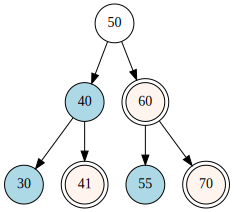

In [20]:
b1 = BST(50)
b1.insert(40)
b1.insert(60)
b1.insert(30)
b1.insert(41)
b1.insert(55)
b1.insert(70)

visualize_tree(b1)

In [23]:
class DiGraph:
    def __init__(self):
        self.g = {}
    
    def add_node(self, node):
        if node in self.g:
            raise ValueError("Node already in graph")
        
        self.g[node] = []
        
    def add_edge(self, src, dest):
        if src not in self.g:
            raise ValueError("Source node not in graph")
        
        if dest not in self.g:
            raise ValueError("Destination node not in graph")
            
        src_edges = self.g[src]
        if dest in src_edges:
            return
        
        src_edges.append(dest)
        